# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Apartado 1: Clustering

__Número de grupo: 15__

__Nombres de los estudiantes:__
- Daniela Alejanda Córdova
- David Bugoi
- Erik Karlgren Domercq

## 1) Carga del conjunto de datos

Crea un dataframe a partir del fichero `countries_of_the_world.csv` que se proporciona junto con la práctica. Usa como índice el nombre de los países. 

Vamos a eliminar la columna `Region` por ser categórica y todas las filas en las que faltan valores usando la operación `dropna`.

Muestra el dataframe resultante y explica cuántos países y variables contiene.

In [1]:
import pandas as pd

df = pd.read_csv (r'countries_of_the_world.csv', index_col='Country')
df = df.drop(['Region'], axis=1)  # Eliminamos la columna 'Region'
df = df.dropna()                  # Eliminamos las filas a las que les falten valores
df

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,,
Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
Anguilla,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
Antigua & Barbuda,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,25730435,912050,28.2,0.31,-0.04,22.20,4800.0,93.4,140.1,2.95,0.92,96.13,2.0,18.71,4.92,0.040,0.419,0.541
Vietnam,84402966,329560,256.1,1.05,-0.45,25.95,2500.0,90.3,187.7,19.97,5.95,74.08,2.0,16.86,6.22,0.209,0.410,0.381
Yemen,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393


Tras eliminar los países de los que no sabemos algunos datos y la columna 'Region', tenemos en total 179 países (1 por cada fila) y tantas variables como columnas tiene el dataframe, es decir, 18.

## 2) Análisis de los datos

En este notebook vamos a trabajar con un subconjunto de las variables. Crea un nuevo dataframe que sólo contenga las variables `GDP ($ per capita)`, `Literacy (%)`, `Phones (per 1000)`, `Agriculture`, `Industry` y `Service`. ¿Qué crees que representan cada una de esas variables?

Analiza razonadamente las distribuciones de cada una de las variables (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).

In [2]:
dp = df.loc[:, ['GDP ($ per capita)', 'Literacy (%)','Phones (per 1000)','Agriculture','Industry','Service']]
dp.describe()

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,9125.698324,81.944134,208.151955,0.156905,0.288028,0.554508
std,9644.123141,19.837537,210.121875,0.151343,0.140310,0.165670
min,500.000000,17.600000,0.200000,0.000000,0.032000,0.062000
25%,1800.000000,69.950000,27.100000,0.039000,0.197000,0.424500
50%,5100.000000,90.900000,137.100000,0.101000,0.274000,0.559000
75%,12950.000000,97.800000,335.000000,0.233000,0.349000,0.668500
max,37800.000000,100.000000,898.000000,0.769000,0.906000,0.954000


### Significado de las variables
Viendo el rango de valores de cada una de las variables podemos deducir qué significa cada una de ellas:
- ***GDP ($ per capita)*:** Producto Interior Bruto (PIB) per cápita en dólares.
- ***Literacy (%)*:** porcentaje de la población que sabe leer y escribir.
- ***Phones (per 1000)*:** número de teléfonos por cada 1000 habitantes.
- ***Agriculture*, *Industry* y *Service*:** porcentaje del PIB dedicado a la agricultura, la industria y el sector servicios respectivamente.


### Análisis de cada variable
...

### Análisis de cada par de variables

...

In [6]:
# Correlaciones par a par
dp.corr(method='pearson')

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
GDP ($ per capita),1.000000,0.522880,0.883520,-0.616919,0.032855,0.536551
Literacy (%),0.522880,1.000000,0.592042,-0.620514,0.105703,0.474395
Phones (per 1000),0.883520,0.592042,1.000000,-0.631578,-0.084247,0.649638
Agriculture,-0.616919,-0.620514,-0.631578,1.000000,-0.352785,-0.613489
Industry,0.032855,0.105703,-0.084247,-0.352785,1.000000,-0.521413
Service,0.536551,0.474395,0.649638,-0.613489,-0.521413,1.000000


Comentar...

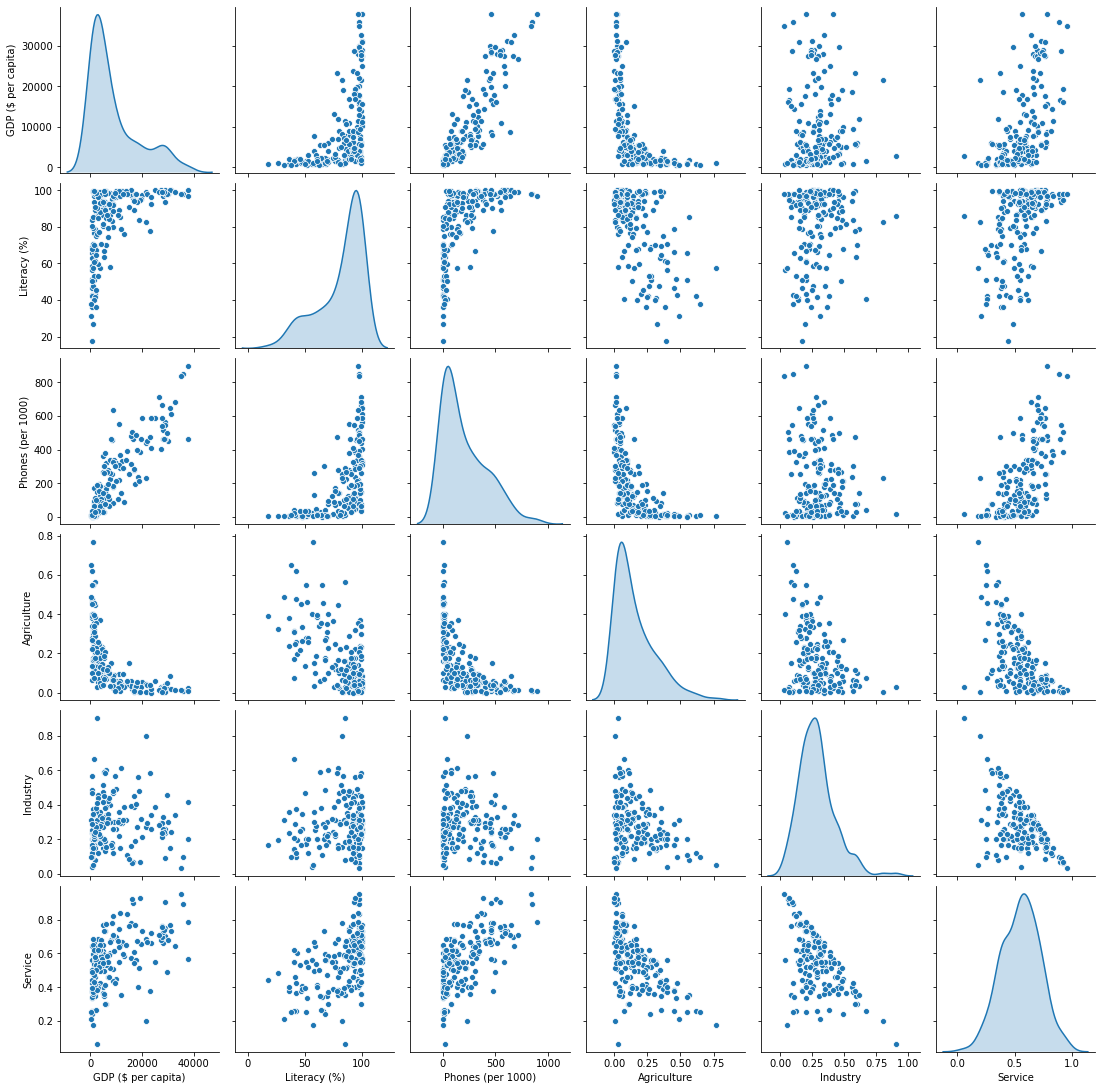

In [8]:
import seaborn as sns

sns.pairplot(dp, diag_kind='kde')

## 3) Preprocesar los datos

Teniendo en cuenta que vamos a utilizar el algoritmo k-Means para encontrar grupos de países similares, explica razonadamente si es necesario o no cambiar la escalas de los datos y si a priori es mejor reescalarlos (MinMaxScaler) o estandarizarlos (StandarScaler).

Si decides preprocesarlos, accede al array interno del dataframe y crea un nuevo array con los datos escalados.

## 4) Encontrar el número óptimo de clusters

Decide razonadamente el número óptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un número excesivo de clusters. Para hacerlo calcula y pinta el diagrama del codo, el índice davies_boulding y el coeficiente silhouette en función del número de clusters.

## 5) Descripción de los clusters

Describe los clusters que has obtenido en el apartado anterior y trata identificar el grupo de países que contienen. Si te han salido más de 3 elige 3 de ellos que sean bastante diferentes entre sí. 

Para hacerlo estudia sus descriptores estadísticos y pinta el diagrama de dispersión en función de cada par de variables usando colores diferentes para cada cluster. ¿Qué clusters se separan mejor y en función de qué variables? ¿y cuáles se confunden más?

__Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. Si decidiste escalar los datos, deberás ejecutar kMeans con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. Puede que aparezca un SettingWithCopyWarning por asignar una nueva columna en un dataframe que es una vista de otro dataframe. Puedes ignorar este aviso o puedes hacer una copia del dataframe con `copy` para que no comparta memoria con el otro.